In [1]:
"""
This code belongs to the paper:
-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 21 Storey building.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 21 Storey building.\n'

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
reverse_arr = [
[-1.9856578360681794
,-2999.1054873824546
,2.000594188269195
,2999.421070107903]
,
[1.9993880674656803
,2998.751240420418
,-4.004425002532981
,-5998.559737234919
,1.983354401651775
,2999.9804929627767]

,
[1.996019659650603
,2998.1820045623476
,-3.987879225886737
,-5995.060773070505
,1.9985362835677112
,2996.4584540504925]
,

[1.9923740734765514
,2996.245771840961
,-4.003049477280969
,-5992.0037657290295
,2.0103310724543872
,2995.17468795253]
,

[1.9903495270787748
,2998.0981101181233
,-3.994933600084622
,-5996.061077113376
,1.9677395409015634
,2998.1635345032882]

,
[2.0184651208568294
,2998.6859393507852
,-4.013114574041832
,-5999.281885073903
,2.0082113462257722
,3000.7909039506276]

,
[2.0315832268965677
,2998.1430900690357
,-4.0125547137838815
,-5995.891507106089
,2.0348119808240726
,2997.396188667701]

,
[1.9858062831074283
,2996.759148055798
,-3.9835494379162357
,-5994.755364268647
,2.0080597987567144
,2997.543372325106]

,
[1.979841912935129
,2997.5049710046123
,-3.97780877166546
,-5996.012284491217
,1.9838493670140263
,2998.373479074605]

,
[1.9833756187404543
,2998.0413562761296
,-3.9941528472406467
,-5995.655950234483
,2.0060493894186107
,2998.14921073922
 ]
,
[2.010651978135515
,2995.303927591743
,-3.991046283337433
,-5992.480161357249
,2.011565108911237
,2996.3421381542726]

,
[1.9891507455464754
,2997.225156924738
,-3.9954768388570536
,-5993.755010355408
,1.9979328203945448
,2996.4422466945043]
,

[1.994151369277238
,2996.4682007949355
,-4.008009864622892
,-5994.161063061209
,1.9737644876973743
,2997.002237861422]
,
[2.0131723478710017
,2996.496308680628
,-3.9880382130431014
,-5992.291368239411
,1.9961713333240416
,2995.8048619707147]
,

[1.9834191248660422
,2994.1484681705238
,-3.997373785900647
,-5987.325660253337
,1.9942890233748591
,2992.521744769699]

,
[1.98562902096774
,2992.852521317974
,-3.9763036937142964
,-5987.567329167563
,1.9988779200040339
,2994.566374614491]
,
[2.0064045864978093
,2994.4078519404666
,-4.012196463914909
,-5988.012296609312
,2.0060507756250177
,2993.4584411061032]
,
[2.003870581443681
,2995.5104018460484
,-4.010279460375954
,-5989.784169905727
,1.9864022322107955
,2992.599722524427]
,
[1.993968333712578
,2992.438811087823
,-4.022797352850086
,-5987.074654692968
,2.0278642439463197
,2993.568082947166]
,
[1.9961389992338232
,2997.770203503636
,-4.006894532350776
,-5992.989301531508
,2.0280011684999084
,2991.9358537257626]
,
[1.9710619223855972
,2998.6391100391693
,-3.984083429356548
,-5998.5450813651705]
    
]

In [3]:
theta = []

for i in range(20, -1, -1):
#     print(reverse_arr[i])
    theta.append(reverse_arr[i])

In [4]:
def drift_mat(dof, Theta):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    p = 0
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = Theta[p][3]
            A[i][i] = Theta[p][2]
            A[i][i+1] = Theta[p][1]
            A[i][i+2] = Theta[p][0]
            p += 1
    
        elif(i==dim-1):
            A[i][i] = Theta[p][0]
            A[i][i-1] = Theta[p][1]
            A[i][i-2] = Theta[p][2]
            A[i][i-3] = Theta[p][3]
            p += 1
            
        else:
            A[i][i-3] = Theta[p][5]
            A[i][i-2] = Theta[p][4]
            A[i][i-1] = Theta[p][3]
            A[i][i] = Theta[p][2]
            A[i][i+1] = Theta[p][1]
            A[i][i+2] = Theta[p][0]
            p += 1
    return A

In [5]:
# for i in range(3, 42):
#     if i%2!=0:
#         p = i-3
#         c = 1
#         while c<=6:
#             print(f'A[{i}][{p}]={A[i][p]}')
#             p += 1
#             c += 1

In [6]:
import numpy as np
dof = 21
A = drift_mat(dof, theta)

In [7]:
diff_arr_iden = [1.003,1.00, 0.994,0.99,0.987,0.995,0.993,0.991,0.991,0.992,0.989,0.993,0.997,1.00,0.997,0.991,1.02,0.995,0.994,0.99,1.02]

In [8]:
'''DIFFUSION TERM  = b'''
diffu_arr = np.zeros(2*dof)
q = 0
for i in range(2*dof):
    if (i%2 != 0):
        diffu_arr[i] = diff_arr_iden[q]
        q += 1

In [9]:
A.shape, diffu_arr.shape

((42, 42), (42,))

In [10]:
A

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.99854508e+03, -3.98408343e+00,  2.99863911e+03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.00442500e+00,  2.99875124e+03,  1.99938807e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.00059419e+00, -2.99910549e+03, -1.98565784e+00]])

In [11]:
def M_DOF_sys(x_initial, T, A, diffu_arr):
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 10000  # no. of samples in the run
    y2 = []
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
             
        y2.append(x[-2,:])      
    y2 = np.array(y2)
    return  y2

In [12]:
import time 
start = time.time()
T = 3
dof = 21
x_initial = np.zeros(2*dof)

y2 = M_DOF_sys(x_initial, T, A, diffu_arr)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

ensemble  :  0
ensemble  :  10
ensemble  :  20
ensemble  :  30
ensemble  :  40
ensemble  :  50
ensemble  :  60
ensemble  :  70
ensemble  :  80
ensemble  :  90
ensemble  :  100
ensemble  :  110
ensemble  :  120
ensemble  :  130
ensemble  :  140
ensemble  :  150
ensemble  :  160
ensemble  :  170
ensemble  :  180
ensemble  :  190
ensemble  :  200
ensemble  :  210
ensemble  :  220
ensemble  :  230
ensemble  :  240
ensemble  :  250
ensemble  :  260
ensemble  :  270
ensemble  :  280
ensemble  :  290
ensemble  :  300
ensemble  :  310
ensemble  :  320
ensemble  :  330
ensemble  :  340
ensemble  :  350
ensemble  :  360
ensemble  :  370
ensemble  :  380
ensemble  :  390
ensemble  :  400
ensemble  :  410
ensemble  :  420
ensemble  :  430
ensemble  :  440
ensemble  :  450
ensemble  :  460
ensemble  :  470
ensemble  :  480
ensemble  :  490
ensemble  :  500
ensemble  :  510
ensemble  :  520
ensemble  :  530
ensemble  :  540
ensemble  :  550
ensemble  :  560
ensemble  :  570
ensemble  :  580
ensemble

ensemble  :  4620
ensemble  :  4630
ensemble  :  4640
ensemble  :  4650
ensemble  :  4660
ensemble  :  4670
ensemble  :  4680
ensemble  :  4690
ensemble  :  4700
ensemble  :  4710
ensemble  :  4720
ensemble  :  4730
ensemble  :  4740
ensemble  :  4750
ensemble  :  4760
ensemble  :  4770
ensemble  :  4780
ensemble  :  4790
ensemble  :  4800
ensemble  :  4810
ensemble  :  4820
ensemble  :  4830
ensemble  :  4840
ensemble  :  4850
ensemble  :  4860
ensemble  :  4870
ensemble  :  4880
ensemble  :  4890
ensemble  :  4900
ensemble  :  4910
ensemble  :  4920
ensemble  :  4930
ensemble  :  4940
ensemble  :  4950
ensemble  :  4960
ensemble  :  4970
ensemble  :  4980
ensemble  :  4990
ensemble  :  5000
ensemble  :  5010
ensemble  :  5020
ensemble  :  5030
ensemble  :  5040
ensemble  :  5050
ensemble  :  5060
ensemble  :  5070
ensemble  :  5080
ensemble  :  5090
ensemble  :  5100
ensemble  :  5110
ensemble  :  5120
ensemble  :  5130
ensemble  :  5140
ensemble  :  5150
ensemble  :  5160
ensemble  

ensemble  :  9180
ensemble  :  9190
ensemble  :  9200
ensemble  :  9210
ensemble  :  9220
ensemble  :  9230
ensemble  :  9240
ensemble  :  9250
ensemble  :  9260
ensemble  :  9270
ensemble  :  9280
ensemble  :  9290
ensemble  :  9300
ensemble  :  9310
ensemble  :  9320
ensemble  :  9330
ensemble  :  9340
ensemble  :  9350
ensemble  :  9360
ensemble  :  9370
ensemble  :  9380
ensemble  :  9390
ensemble  :  9400
ensemble  :  9410
ensemble  :  9420
ensemble  :  9430
ensemble  :  9440
ensemble  :  9450
ensemble  :  9460
ensemble  :  9470
ensemble  :  9480
ensemble  :  9490
ensemble  :  9500
ensemble  :  9510
ensemble  :  9520
ensemble  :  9530
ensemble  :  9540
ensemble  :  9550
ensemble  :  9560
ensemble  :  9570
ensemble  :  9580
ensemble  :  9590
ensemble  :  9600
ensemble  :  9610
ensemble  :  9620
ensemble  :  9630
ensemble  :  9640
ensemble  :  9650
ensemble  :  9660
ensemble  :  9670
ensemble  :  9680
ensemble  :  9690
ensemble  :  9700
ensemble  :  9710
ensemble  :  9720
ensemble  

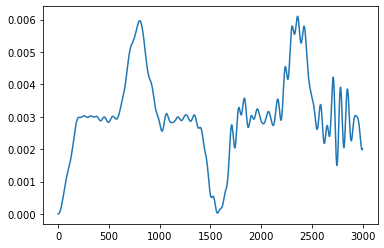

In [13]:
import matplotlib.pyplot as plt
plt.plot(np.mean((y2), axis=0))
plt.show()

In [14]:
pickle.dump(y2, open('MDOF_Final_relia_dt_0.001_T_3_sec.p', 'wb'))